In [26]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf
import PIL.ImageOps as ImageOps
import PIL.Image as Image
from tqdm import tqdm

In [27]:
# Now we create the class names and store them in the labels.

class_names = ['aloevara',
                'nagfani',
               'neem',
               'tulsi'
               ]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (224, 224)

In [28]:
nb_classes

4

In [29]:
def pre_process(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE) 
    return image

## Data load and Preprocess

In [30]:
def load_data():
    
    datasets = ['imagedataset/train','imagedataset/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        #print(dataset)
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            #print(folder)
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = pre_process(img_path) 
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [31]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /kaggle/input/ayurvedic-plant-dataset/imagedataset/train


100%|██████████| 18/18 [00:00<00:00, 253.21it/s]


Loading /kaggle/input/ayurvedic-plant-dataset/imagedataset/test


100%|██████████| 4/4 [00:00<00:00, 215.59it/s]


In [32]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [33]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 57
Number of testing examples: 17
Each image is of size: (224, 224)


## Scaling the Data

In [34]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

## Visualization

In [35]:
def display_examples(class_names, images, labels):
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [36]:
# A function to simply display only one random image
def display_random_image(class_names, images, labels):
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

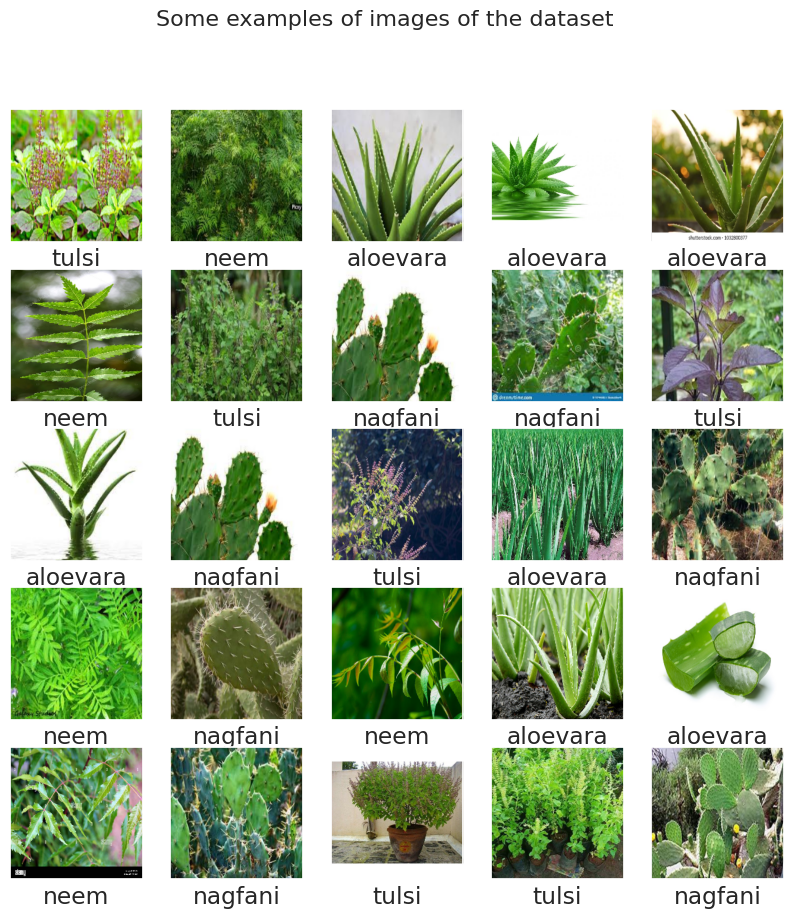

In [37]:
display_examples(class_names, train_images, train_labels)


## Model Creation

In [38]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.applications.EfficientNetB7(include_top=False, weights='imagenet', input_shape=(224,224,3)),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(2048, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='softmax')
])



In [39]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf
import PIL.ImageOps as ImageOps
import PIL.Image as Image
from tqdm import tqdm

In [40]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 279s 279s/step - accuracy: 0.0222 - loss: 5.1121 - val_accuracy: 0.0000e+00 - val_loss: 3.4966
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0667 - loss: 4.1072 - val_accuracy: 0.2500 - val_loss: 3.5243
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0889 - loss: 3.4077 - val_accuracy: 0.2500 - val_loss: 3.5192
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5111 - loss: 2.0337 - val_accuracy: 0.2500 - val_loss: 3.5277
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6667 - loss: 1.1465 - val_accuracy: 0.2500 - val_loss: 3.5514
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7333 - loss: 0.9433 - val_accuracy: 0.2500 - val_loss: 3.6109
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8889 - loss: 0.4205 - val_accuracy: 0.2500 - val_loss: 3.6869
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9778 - loss: 0.2907 - val_accuracy: 0.2500 - val_loss: 3.7923
Epoch 9/

In [42]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

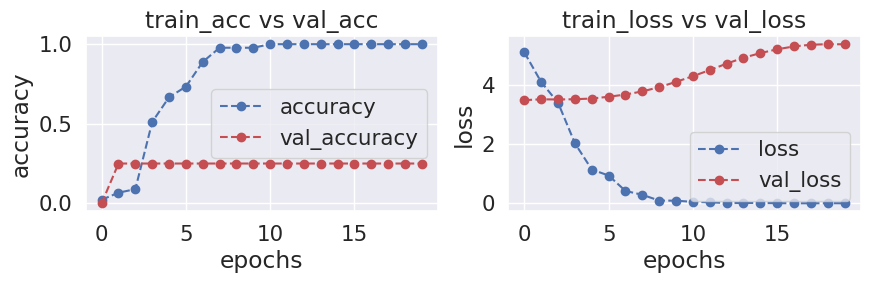

In [43]:
plot_accuracy_loss(history)
